# Project: Password Strength Classifier using NLP techniques

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data=pd.read_csv('data.csv',error_bad_lines=False)  # additional attribute used to overcome Parser error
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


### Data pre-processing

In [3]:
# To know the categories of strength column

data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
# Checking missing values in dataset

data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
# Finding the column with missing value

data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
# Removing missing value column

data.dropna(inplace=True)

In [7]:
data.isnull().sum()

password    0
strength    0
dtype: int64

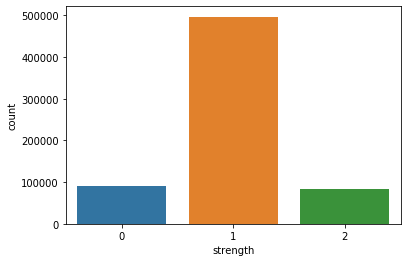

In [8]:
# Getting to know the distribution of different categories

sns.countplot(data['strength'])

In [9]:
# Converting dataframe into array (so as to do shuffling ahead)

password_tuple=np.array(data)

In [10]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
# shuffling randomly for robustness

import random
random.shuffle(password_tuple)

In [12]:
# Seperating independent and dependent variables

x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [13]:
x

['kzde5577',
 'kino3434',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'visi7k1yr',
 'visi7k1yr',
 'visi7k1yr',
 'kino3434',
 'kzde5577',
 'as326159',
 'as326159',
 'kzde5577',
 'visi7k1yr',
 'v1118714',
 'megzy123',
 'as326159',
 'asv5o9yu',
 'asv5o9yu',
 'kzde5577',
 'v1118714',
 'kzde5577',
 '612035180tok',
 'kzde5577',
 'v1118714',
 'klara-tershina3H',
 'kzde5577',
 '52558000aaa',
 'asv5o9yu',
 'asv5o9yu',
 'elyass15@ajilent-ci',
 'megzy123',
 'u6c8vhow',
 '612035180tok',
 'idofo673',
 '52558000aaa',
 'asv5o9yu',
 'sbl571017',
 'intel1',
 'megzy123',
 'g067057895',
 'exitos2009',
 'kswa2mrv',
 'fk9qi21m',
 'jerusalem393',
 'kino3434',
 'czuodhj972',
 'jerusalem393',
 'yitbos77',
 'asgaliu11',
 'jytifok873',
 'memjan123',
 'u6c8vhow',
 'intel1',
 'c3h8bkzr',
 'schalke04',
 'g067057895',
 'tamanagung6',
 'openup12',
 'jytifok873',
 'kzde5577',
 '612035180tok',
 'faranumar91',
 'go7kew7a2po',
 'fk9qi21m',
 'intel1',
 'gaymaids1',
 'bgrvl80',
 'snolyuj04',
 'gaymaids1',
 'go7ke

### Applying TF-IDF vectorizer

In [14]:
# Creating a custom function to split input into characters of list

def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [15]:
# Example:

word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [16]:
# Importing TF-IDF vectorizer to convert string data into numerical data

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [17]:
# Applying TF-IDF vectorizer on data

X=vectorizer.fit_transform(x)

In [18]:
X.shape

(669639, 122)

In [19]:
# Getting feature names

vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x10',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¨',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '‚',
 '…',
 '›']

### Implementing the model

In [20]:
# Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape

(535711, 122)

In [22]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

In [23]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [24]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Doing prediction for specific custom data

dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

In [26]:
# So the answer is- 1 which means Average strength

In [27]:
# Doing prediction on X-Test data

y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Evaluating the model

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5360 12538    10]
 [ 3795 93187  2624]
 [   41  5201 11172]]
0.8192386954184337


In [30]:
# Creating report of your model

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     17908
           1       0.84      0.94      0.89     99606
           2       0.81      0.68      0.74     16414

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

